# **1.**

In [41]:
import numpy as np
import matplotlib.pyplot as plt

v1 = [2, -1] 
v2 = [1, 1]
v3 = [ 3 ,1]
A = np.array([v1,v2,v3]).T
b= np.array([[2],[1],[2]])
A_2 = np.dot(A,A.T)
b = A @ b
sol = np.linalg.solve(A_2,b)

def Linear_v1(x):
  return 2*x-2
def Linear_v2(x):
  return (1-x)/2
def Linear_v3(x):
  return 4-x

X=np.linspace(-5,10,100)


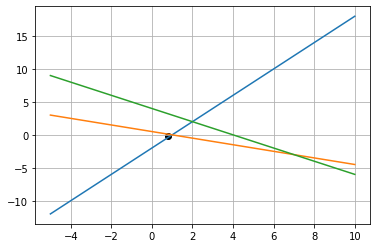

In [42]:
fig, ax= plt.subplots()
ax.plot(X,Linear_v1(X))
ax.plot(X,Linear_v2(X))
ax.plot(X,Linear_v3(X))
ax.scatter(sol[0],sol[1],color="black")
ax.grid()

In [36]:
#Grafica minimizar distancia  
def norm_distance(sol,x,y):
  return ((x-0.81578947)**2+(y--0.21052632)**2)
pts = int(round((10/0.003)))

x = np.linspace(-5,5,pts)
y = np.linspace(-5,5,pts)
X,Y = np.meshgrid(x, y)

Z = np.zeros(X.shape)
for i in range(len(y)):
  for j in range(len(x)):
    Z[i][j] = norm_distance(sol,X[i][j],Y[i][j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The following kwargs were not used by contour: 'edgecolor'
  


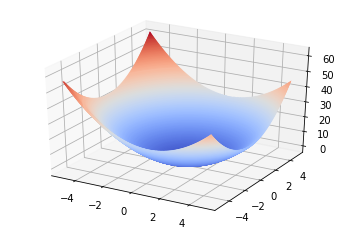

In [39]:

ax = plt.axes(projection='3d')
ax.contour3D(x, y,Z, 400, cmap='coolwarm', edgecolor='red')
ax.scatter([0.81578947],[-0.21052632],c="r")

# **8.**

In [239]:

u1 = [3,1,0,1]
u2 = [1,2,1,1]
u3 = [-1,0,2,-1]
A = np.array([u1,u2,u3]).T
b = np.array([-3,-3,8,9])

In [240]:
x = np.linalg.pinv(A) @ b

In [241]:
A @ x

array([-2.00000000e+00,  3.00000000e+00,  4.00000000e+00,  1.33226763e-15])

In [217]:

import numpy as np
import matplotlib.pyplot as plt

u1 = [3,1,0,1]
u2 = [1,2,1,1]
u3 = [-1,0,2,-1]
A = np.array([u1,u2,u3]).T
A_T = np.array([u1,u2,u3])
b = np.array([-3,-3,8,9])
A_1 = np.copy(A)
def GramSchmidt(A,b):
    (f,c) = A_1.shape    
    b_1 = np.zeros(f)
    for i in range(c):
        M = A_1[:,i]
        M = M/(np.dot(M,M)**0.5)
        b_1[i] =  np.dot(b,M).round(0)
        for j in range(i):
            M = M - (np.dot(A_T[:,i],A_T[:,i])*A_1[:,j])
        A_1[:,i] = M
        print(M)
    return b_1
b_p = GramSchmidt(A_1,b)
print("________________")
print(b_p)



[0.90453403 0.30151134 0.         0.30151134]
[0.37796447 0.75592895 0.37796447 0.37796447]
[-0.40824829  0.          0.81649658 -0.40824829]
________________
[-1.  3.  4.  0.]


array([ 0.25633581, -0.26982716,  0.78249877, -0.49918025])

In [256]:
# Linea por Linea 
u1 = np.array(u1)
u2 = np.array(u2)
u3 = np.array(u3)
e1 = -u1/np.dot(u1,u1)**0.5
u2 =  u2 - u1*(np.dot(u1,u2)/np.dot(u1,u1))
e2 = -u2/np.dot(u2,u2)**0.5
u3 = u3 - (u1*(np.dot(u1,u3)/np.dot(u1,u1))) - u2*(np.dot(u2,u3)/np.dot(u2,u2))
e3 = -u3/np.dot(u3,u3)**0.5
M = np.array([e1,e2,e3])
b = np.array([-3,-3,8,9])
print(M.T)

[[-0.90453403  0.32961713 -0.25633581]
 [-0.30151134 -0.75341057  0.26982716]
 [ 0.         -0.51796977 -0.78249877]
 [-0.30151134 -0.2354408   0.49918025]]


In [255]:
M.T@M@b

array([-2.0000000e+00,  3.0000000e+00,  4.0000000e+00,  4.4408921e-16])

# **6.**


para obtener las distancias se hace simplemente la diferencia entre las dos alturas.

$$y'_i - y_i$$

Esta distancia da una medida del error entre el modelo y los puntos. Para tener solo cantidades positivas se eleva al cuadrado:

$$(y'_i - y_i)^2$$

si se suman todos los cuadrados tendremos una medida del error total

$$\sum_{i=1}^{i=n}(y'_i - y_i)^2$$

Se desea que el valor del error sea el más pequeño posible por lo que se desea encontrar el valor mínimo de la ecuación anterior. 
Al tratarse de una función cuadrática positiva, el mínimo se puede hallar simplemente derivando respecto a $m$ e igualando a cero y repitiendo el proceso para $b$:

$$\frac{\partial \sum(y'_i - y_i)^2}{\partial m}=0$$
$$\frac{\partial \sum(y'_i - y_i)^2}{\partial b}=0$$

Sustituyendo a $y_i'$ por $mx_i+b$

$$\frac{\partial \sum(mx_i+b - y_i)^2}{\partial m}=0$$
$$\frac{\partial \sum(mx_i+b - y_i)^{2}}{\partial b}=0$$

Con esto se obtiene

$$\sum_{i=1}^{n} y_i = nb+ m\sum_{i=1}^n x_i$$
$$\sum_{i=1}^{n} x_iy_i = b\sum_{i=1}^{n}x_i+ m\sum_{i=1}^n x_i^2$$

Resolviendo para $m$ y $b$ se tiene

$$\boxed{m = \frac{\sum x_iy_i-\frac{1}{n}\sum x_i \sum y_i}{\sum x_i^2 - \frac{1}{n}\left(\sum x_i\right)^2}}$$

$$\boxed{b = \frac{1}{n}\sum y_i - \frac{m}{n}\sum x_i}$$

A continuación, se muestra un ejemplo de implementación de estas ecuaciones:

*Tomado de las notas de clase de el curso de Herramientas Computacionales 2021-2*




$$X^2\:\left(a_{0,}a_1,a_2\right)\:=\:\sum _{i\:=1}^n\left(\left(y_i-\left(a_0+a_1xi+a_2x_i^2\right)\right)^2\right)\: $$

$$\sum_{i=1}^N(y_i - (a + bx_i + cx_i^2))^2
$$

$$ \sum _{i=1}^n\left(-2\left(y-a-bx_i-x_i^2c\right)\right)$$

$$\:\sum \:_{i=1}^n\left(-2\left(-a-bx_i-x_i^2c\right)\right)\:=\:2\:\sum \:\:_{i=1}^ny_i\:$$

$$\:\sum \:_{i=1}^n\left(\left(a+bx_i+x_i^2c\right)\right)\:=\:\:\sum \:\:_{i=1}^n\:y_i\:$$

De forma similar para las derivadas con respecto a a ,b y c.

